<a href="https://colab.research.google.com/github/alaukikpachauri/nlp-learning-journey/blob/main/POS_and_NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install spacy

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import spacy
nlp = spacy.load("en_core_web_sm")

# POS: exercies

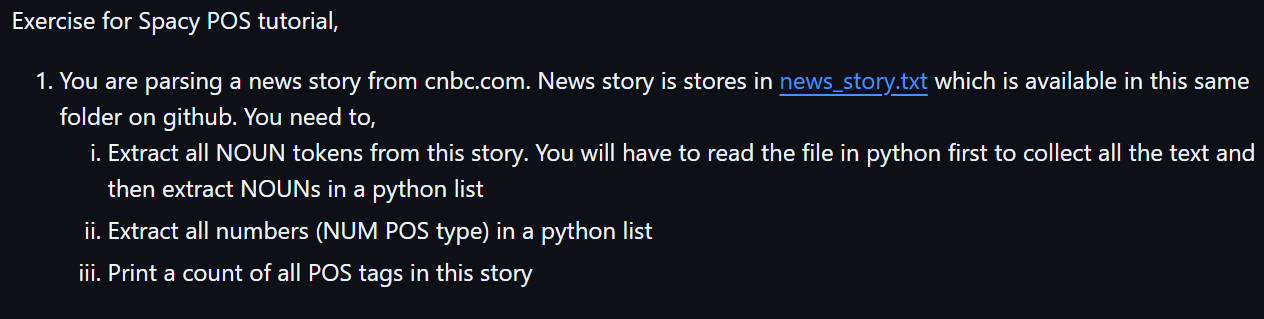

[use this as text file if error](https://drive.google.com/file/d/1pl3l3xYO8D33ZsziCJP3K4VRkNoCMmlh/view?usp=sharing)

In [8]:

file_path = '/content/news_story.txt'

try:
    with open(file_path, 'r') as f:
        news = f.read()
    print("File loaded successfully. The content is stored in the 'news_story_content' variable.")
    # You can print the first few characters to verify:
    # print(news_story_content[:500])
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure it's uploaded to the Colab environment or the path is correct.")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully. The content is stored in the 'news_story_content' variable.


In [9]:
news[0:500]

'Inflation rose again in April, continuing a climb that has pushed consumers to the brink and is threatening the economic expansion, the Bureau of Labor Statistics reported Wednesday.\n\nThe consumer price index, a broad-based measure of prices for goods and services, increased 8.3% from a year ago, higher than the Dow Jones estimate for an 8.1% gain. That represented a slight ease from March’s peak but was still close to the highest level since the summer of 1982.\n\nRemoving volatile food and energ'

when file was connented properly the output screenshot is below
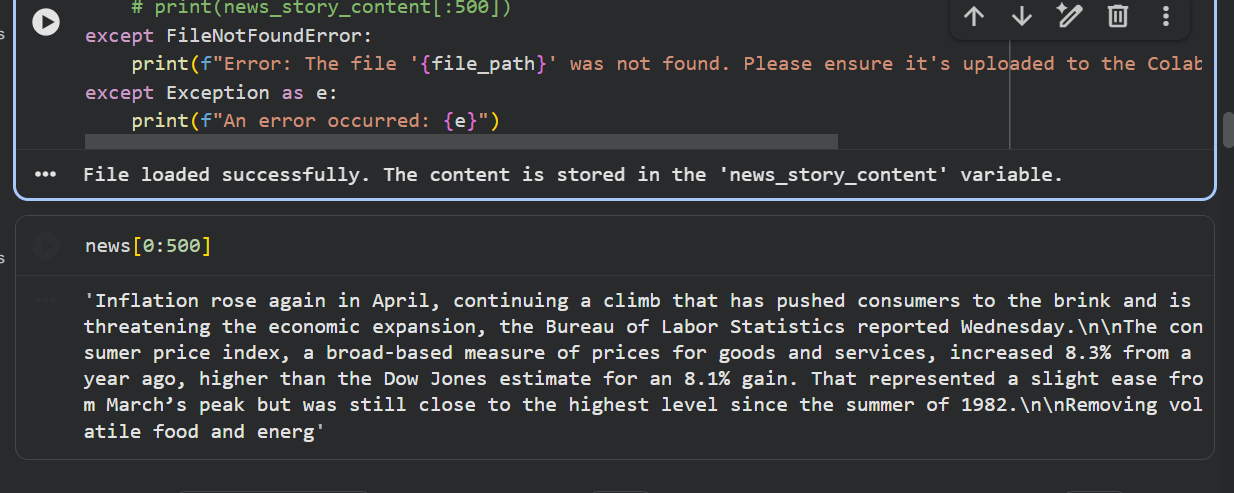

Since the file `news_story.txt` was not found, the `news` variable was not defined. However, a `text` variable has already been defined in a later cell (cell `Fvi4BszprB-6`). We can use this `text` variable as the input for your spaCy operations to proceed.

# Use the existing 'text' variable as the content for 'news'
news = text
print("Variable 'news' has been defined using the content of 'text'.")
print(news[0:500])

In [10]:
df = nlp(news)
i = 0
n =[]
N = []
for token in df:
  if token.pos_ == 'NOUN':
    i = i+1
    n.append(token)
    N.append(token)
print(i,n[:10])
print(N[:10])


96 [Inflation, climb, consumers, brink, expansion, consumer, price, index, measure, prices]
[Inflation, climb, consumers, brink, expansion, consumer, price, index, measure, prices]


output image:
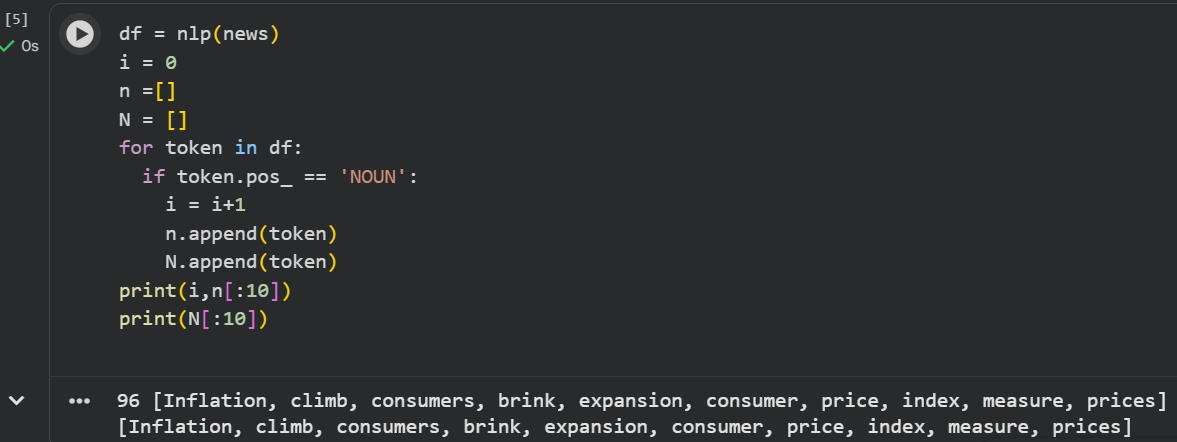

# extra function about pos tounderstand it deeply

In [11]:
filtered_tokens = []
pos_to_exclude = ['PUNCT', 'DET', 'AUX', 'ADP']

for token in df[0:500]:
    if token.pos_ not in pos_to_exclude:
        filtered_tokens.append(token)
        print(token,' | ',token.pos_,' | ',token.tag_,' | ', spacy.explain(token.tag_))



Inflation  |  NOUN  |  NN  |  noun, singular or mass
rose  |  VERB  |  VBD  |  verb, past tense
again  |  ADV  |  RB  |  adverb
April  |  PROPN  |  NNP  |  noun, proper singular
continuing  |  VERB  |  VBG  |  verb, gerund or present participle
climb  |  NOUN  |  NN  |  noun, singular or mass
that  |  PRON  |  WDT  |  wh-determiner
pushed  |  VERB  |  VBN  |  verb, past participle
consumers  |  NOUN  |  NNS  |  noun, plural
brink  |  NOUN  |  NN  |  noun, singular or mass
and  |  CCONJ  |  CC  |  conjunction, coordinating
threatening  |  VERB  |  VBG  |  verb, gerund or present participle
economic  |  ADJ  |  JJ  |  adjective (English), other noun-modifier (Chinese)
expansion  |  NOUN  |  NN  |  noun, singular or mass
Bureau  |  PROPN  |  NNP  |  noun, proper singular
Labor  |  PROPN  |  NNP  |  noun, proper singular
Statistics  |  PROPN  |  NNPS  |  noun, proper plural
reported  |  VERB  |  VBD  |  verb, past tense
Wednesday  |  PROPN  |  NNP  |  noun, proper singular


  |  SPACE  | 

Output of it:
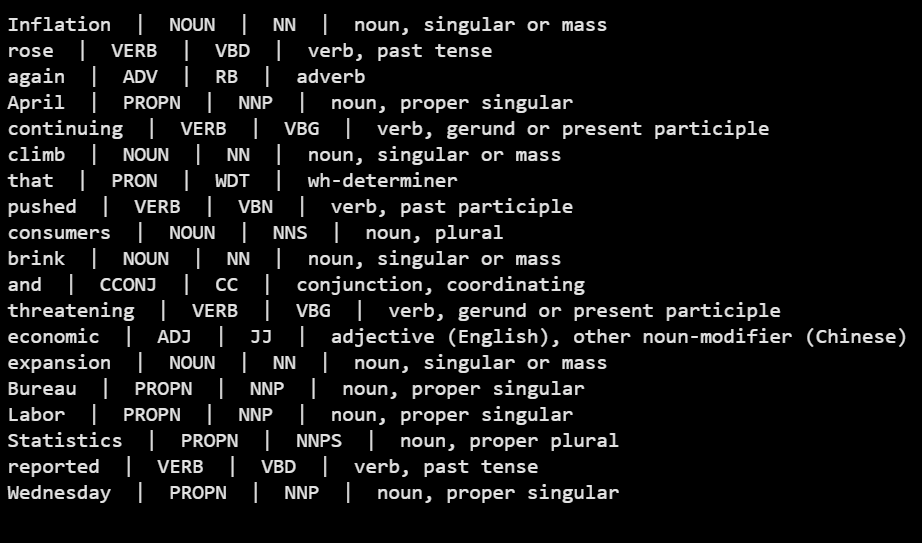

In [12]:
num=[]
Num=[]
for token in df:
  if token.like_num:
    num.append(token)
  if token.pos_ == 'NUM':
    Num.append(token)
print(num)
print(Num)

print(f"\ncount_by(spacy.attrs.POS): {df.count_by(spacy.attrs.POS)}")

[8.3, 8.1, 1982, 6.2, 6, 0.3, 0.2, 0.6, 0.4, 0.1, 0.3, 2.6, 5.5, 2021, 1984, one, two, two, 2]
[8.3, 8.1, 1982, 6.2, 6, 0.3, 0.2, 0.6, 0.4, 0.1, 0.3, 2.6, 5.5, 2021, 1984, one, two, two, 2]

count_by(spacy.attrs.POS): {92: 96, 100: 27, 86: 15, 85: 39, 96: 16, 97: 32, 90: 34, 95: 4, 87: 13, 89: 10, 84: 23, 103: 7, 93: 19, 94: 4, 98: 8, 101: 1}


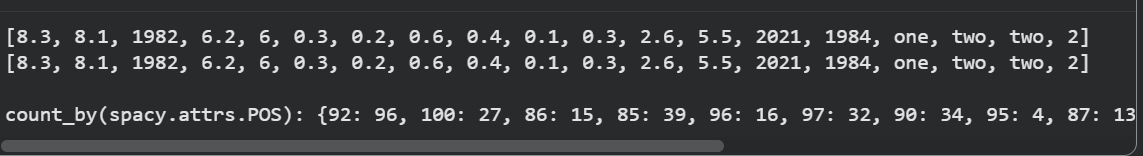

In [13]:
print(df.count_by(spacy.attrs.POS))

{92: 96, 100: 27, 86: 15, 85: 39, 96: 16, 97: 32, 90: 34, 95: 4, 87: 13, 89: 10, 84: 23, 103: 7, 93: 19, 94: 4, 98: 8, 101: 1}


output cell:
{92: 96, 100: 27, 86: 15, 85: 39, 96: 16, 97: 32, 90: 34, 95: 4, 87: 13, 89: 10, 84: 23, 103: 7, 93: 19, 94: 4, 98: 8, 101: 1}


In [14]:
print("POS Tag Counts with Human-Readable Labels:")
pos_counts = df.count_by(spacy.attrs.POS)
print(pos_counts)

for pos_id, count in pos_counts.items():
    # Get the human-readable string for the POS ID
    pos_string = nlp.vocab.strings[pos_id]
    print(f"{pos_string} (ID: {pos_id}): {count}")

POS Tag Counts with Human-Readable Labels:
{92: 96, 100: 27, 86: 15, 85: 39, 96: 16, 97: 32, 90: 34, 95: 4, 87: 13, 89: 10, 84: 23, 103: 7, 93: 19, 94: 4, 98: 8, 101: 1}
NOUN (ID: 92): 96
VERB (ID: 100): 27
ADV (ID: 86): 15
ADP (ID: 85): 39
PROPN (ID: 96): 16
PUNCT (ID: 97): 32
DET (ID: 90): 34
PRON (ID: 95): 4
AUX (ID: 87): 13
CCONJ (ID: 89): 10
ADJ (ID: 84): 23
SPACE (ID: 103): 7
NUM (ID: 93): 19
PART (ID: 94): 4
SCONJ (ID: 98): 8
X (ID: 101): 1


output:
POS Tag Counts with Human-Readable Labels:
{92: 96, 100: 27, 86: 15, 85: 39, 96: 16, 97: 32, 90: 34, 95: 4, 87: 13, 89: 10, 84: 23, 103: 7, 93: 19, 94: 4, 98: 8, 101: 1}
NOUN (ID: 92): 96
VERB (ID: 100): 27
ADV (ID: 86): 15
ADP (ID: 85): 39
PROPN (ID: 96): 16
PUNCT (ID: 97): 32
DET (ID: 90): 34
PRON (ID: 95): 4
AUX (ID: 87): 13
CCONJ (ID: 89): 10
ADJ (ID: 84): 23
SPACE (ID: 103): 7
NUM (ID: 93): 19
PART (ID: 94): 4
SCONJ (ID: 98): 8
X (ID: 101): 1


# **Named Entity Recognition (NER): Exercises**

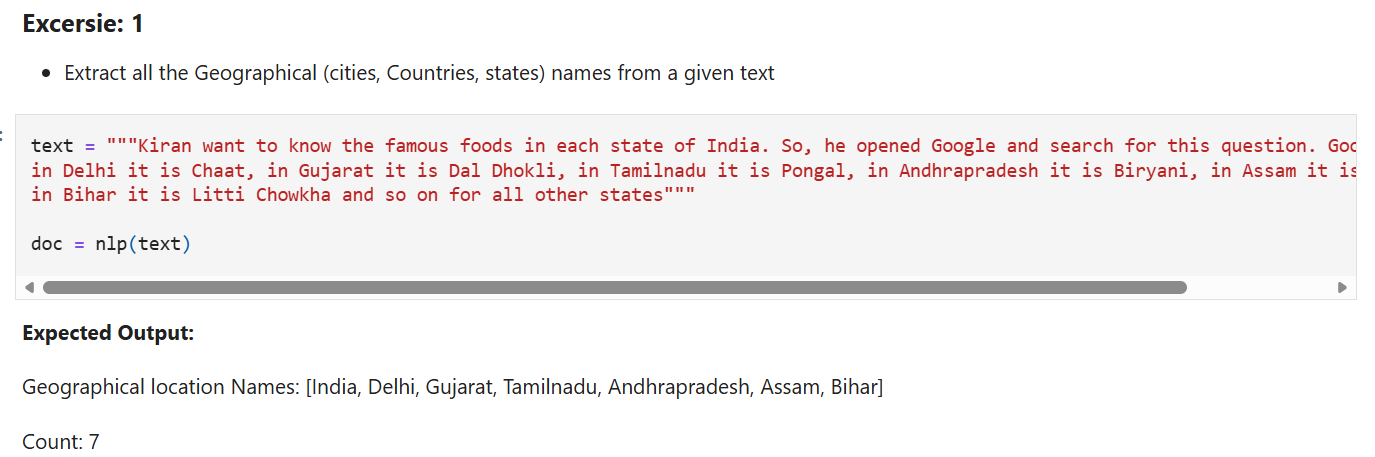

In [15]:
text = """Kiran want to know the famous foods in each state of India. So, he opened Google and search for this question. Google showed that
in Delhi it is Chaat, in Gujarat it is Dal Dhokli, in Tamilnadu it is Pongal, in Andhrapradesh it is Biryani, in Assam it is Papaya Khar,
in Bihar it is Litti Chowkha and so on for all other states"""

doc = nlp(text)

In [16]:
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [17]:
for ent in doc.ents:
  print(ent.text," | ", ent.label_)

Kiran  |  GPE
India  |  GPE
Google  |  ORG
Google  |  ORG
Delhi  |  GPE
Chaat  |  ORG
Gujarat  |  GPE
Dal Dhokli  |  PERSON
Tamilnadu  |  GPE
Pongal  |  PERSON
Andhrapradesh  |  GPE
Biryani  |  PERSON
Assam  |  GPE
Papaya Khar  |  PERSON
Bihar  |  GPE
Litti Chowkha  |  ORG


In [18]:
n=0
for ent in doc.ents:

 if ent.label_ == "GPE":

    print(ent.text)
    n+=1
print("counts: ",n)


Kiran
India
Delhi
Gujarat
Tamilnadu
Andhrapradesh
Assam
Bihar
counts:  8


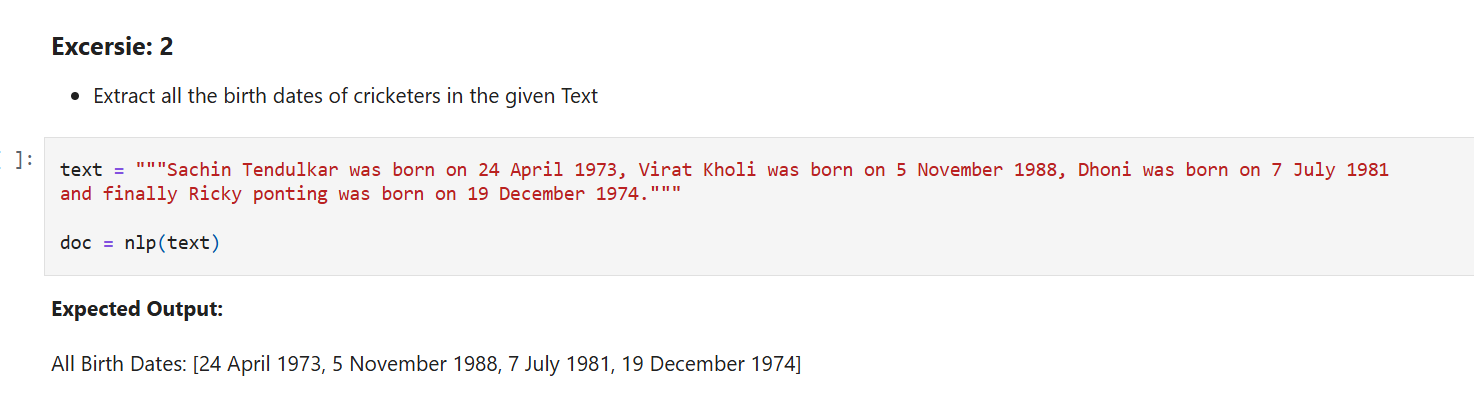

In [19]:
text = """Sachin Tendulkar was born on 24 April 1973, Virat Kholi was born on 5 November 1988, Dhoni was born on 7 July 1981
and finally Ricky ponting was born on 19 December 1974."""

doc = nlp(text)

In [20]:
for ent in doc.ents:
  print(ent,' | ', ent.label_)


Sachin Tendulkar  |  PERSON
24 April 1973  |  DATE
Virat Kholi  |  ORG
5 November 1988  |  DATE
Dhoni  |  PERSON
7 July 1981  |  DATE
Ricky  |  PERSON
19 December 1974  |  DATE


In [21]:
for ent in doc.ents:
  if ent.label_ == 'DATE':
    print(ent)

24 April 1973
5 November 1988
7 July 1981
19 December 1974


lets pratice basic and important function

In [22]:
import spacy

ner_labels = nlp.pipe_labels['ner']
print('ner labels:', ner_labels)
print("---------------------------------")
for label in ner_labels:
    print(f"{label} | {spacy.explain(label)}")

ner labels: ['CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART']
---------------------------------
CARDINAL | Numerals that do not fall under another type
DATE | Absolute or relative dates or periods
EVENT | Named hurricanes, battles, wars, sports events, etc.
FAC | Buildings, airports, highways, bridges, etc.
GPE | Countries, cities, states
LANGUAGE | Any named language
LAW | Named documents made into laws.
LOC | Non-GPE locations, mountain ranges, bodies of water
MONEY | Monetary values, including unit
NORP | Nationalities or religious or political groups
ORDINAL | "first", "second", etc.
ORG | Companies, agencies, institutions, etc.
PERCENT | Percentage, including "%"
PERSON | People, including fictional
PRODUCT | Objects, vehicles, foods, etc. (not services)
QUANTITY | Measurements, as of weight or distance
TIME | Times smaller than a day
WORK_OF_ART | Titles of bo

In [23]:
from spacy import displacy
displacy_functions= dir(displacy)
print(f"displacy functions: {displacy_functions}")
for functions in displacy_functions:
    print(f"{functions} | {spacy.explain(functions)}")

displacy functions: ['Any', 'Callable', 'DependencyRenderer', 'Dict', 'Doc', 'EntityRenderer', 'Errors', 'Iterable', 'Optional', 'RENDER_WRAPPER', 'Span', 'SpanRenderer', 'Union', 'Warnings', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_html', 'app', 'find_available_port', 'get_doc_settings', 'is_in_jupyter', 'parse_deps', 'parse_ents', 'parse_spans', 'render', 'serve', 'set_render_wrapper', 'templates', 'warnings']
Any | None
Callable | None
DependencyRenderer | None
Dict | None
Doc | None
EntityRenderer | None
Errors | None
Iterable | None
Optional | None
RENDER_WRAPPER | None
Span | None
SpanRenderer | None
Union | None
Warnings | None
__builtins__ | None
__cached__ | None
__doc__ | None
__file__ | None
__loader__ | None
__name__ | None
__package__ | None
__path__ | None
__spec__ | None
_html | None
app | apposition
find_available_port | None
get_doc_settings | None
is_in_jupyter | None
parse_deps | None
pars

/usr/local/lib/python3.12/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'Any' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
/usr/local/lib/python3.12/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'Callable' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
/usr/local/lib/python3.12/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'DependencyRenderer' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
/usr/local/lib/python3.12/dist-packages/s

In [24]:
print(displacy.render(doc, style="ent"))
print("--------------------------------------------------------------------------")


None
--------------------------------------------------------------------------


In [25]:
#hugging face has one of the best 'ner'
# so we use the span class of spacy to change or update or create,
# the ents based on our uses


In [26]:

from spacy.tokens import span
s1 = span.Span(doc,0,1,label="ORG")
s2 = span.Span(doc,5,6,label="PERSON")
doc.set_ents([s1,s2], default = "unmodified")
print(displacy.render(doc, style="ent"))

print("------------------------------------------------------------------------")
print(" we have change the ents 'sachin tendular' into 2 different ents")
print("24, is used as person based on the comparion of 2")
print("------------------------------------------------------------------------")

None
------------------------------------------------------------------------
 we have change the ents 'sachin tendular' into 2 different ents
24, is used as person based on the comparion of 2
------------------------------------------------------------------------
